In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Import data
data = pd.read_csv('./data.csv', encoding='latin-1')

# data['Injured'] = data['Injured'].fillna(0)

# Peek
data.head()


,Incident Number,Incident Types,Reported Date,Nearest Populated Centre,Province,Company,Status,Latitude,Longitude,Approximate Volume Released (m³),...,Repair type,Repair date,Equipment or component has never been inspected,Most recent inspection date for the failed equipment or component,Type of most recent inspection,Most recent inspection part of the routine inspection program,No maintenance done on this equipment or component,Date of the most recent maintenance work for the failed equipment or component,Most recent maintenance Type,Most recent maintenance work part of the routine maintenance program
0,INC2019-104,Operation Beyond Design Limits,9/26/2019,Toronto,Ontario,Trans-Northern Pipelines Inc.,Initially Submitted,43.768426,-79.485336,Not Applicable,...,NaN,NaN,No,NaN,NaN,No,No,NaN,NaN,No
1,INC2019-100,Fire,9/11/2019,"Crossfield, AB",Alberta,NOVA Gas Transmission Ltd.,Initially Submitted,51.403753,-114.033970,Not Applicable,...,NaN,NaN,No,NaN,NaN,No,No,NaN,NaN,No
2,INC2019-099,Fire,9/8/2019,"Edson, AB",Alberta,Trans Mountain Pipeline ULC,Initially Submitted,53.575801,-116.647554,Not Applicable,...,NaN,NaN,No,NaN,NaN,No,No,NaN,NaN,No
3,INC2019-098,Release of Substance,9/2/2019,Rapid City,Manitoba,TransCanada Keystone Pipeline GP Ltd.,Initially Submitted,50.074611,-100.000361,10.5,...,NaN,NaN,No,43628.0,Visual,Yes,No,43628.0,Testing of Functionality,Yes
4,INC2019-097,Operation Beyond Design Limits,8/30/2019,Ramore,Ontario,TransCanada PipeLines Limited,Initially Submitted,48.443855,-80.347784,Not Applicable,...,NaN,NaN,No,NaN,NaN,No,No,NaN,NaN,No


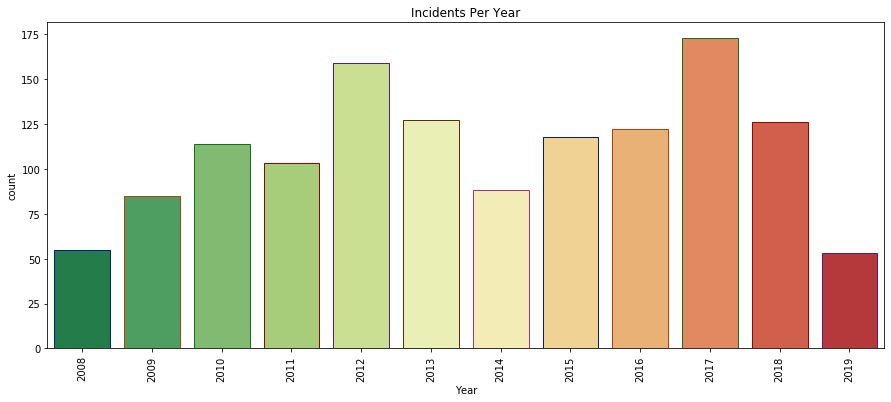

In [4]:

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Incidents Per Year')
plt.show()

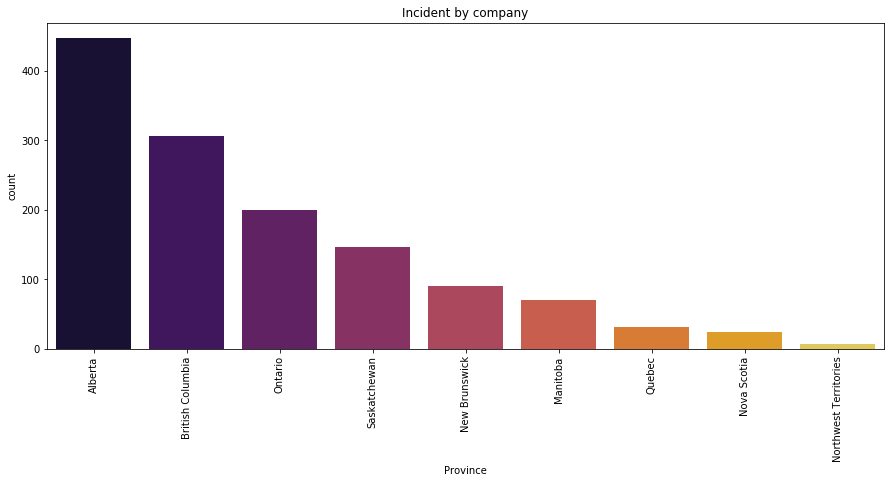

In [5]:
plt.subplots(figsize=(15,6))
sns.countplot('Province',data=data,palette='inferno',order=data['Province'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Incident by company')
plt.show()

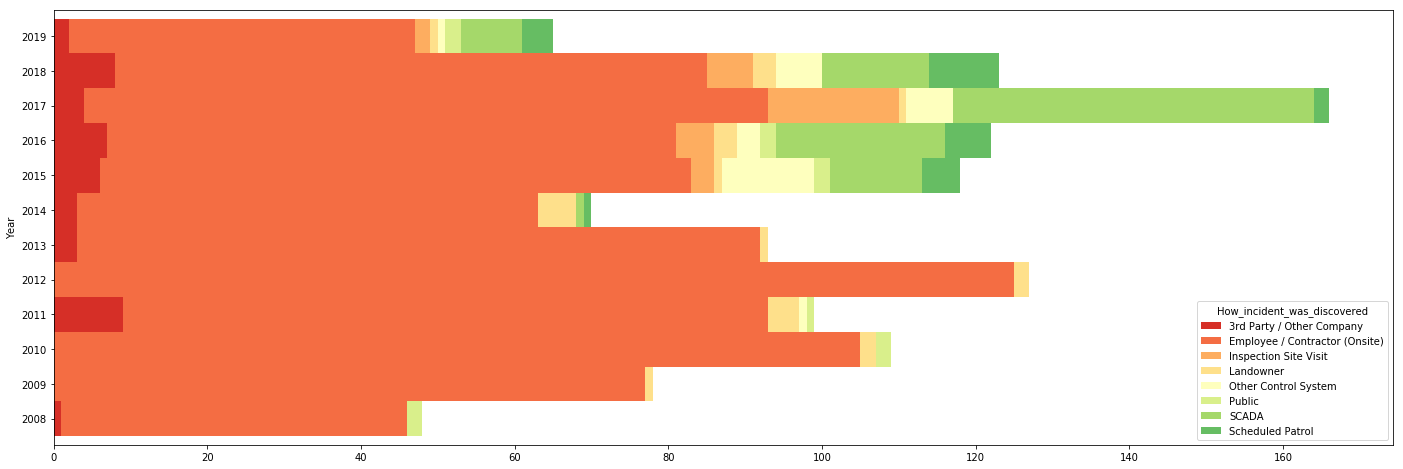

In [18]:
pd.crosstab(data.Year,data.How_incident_was_discovered).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(24,8)
plt.show()

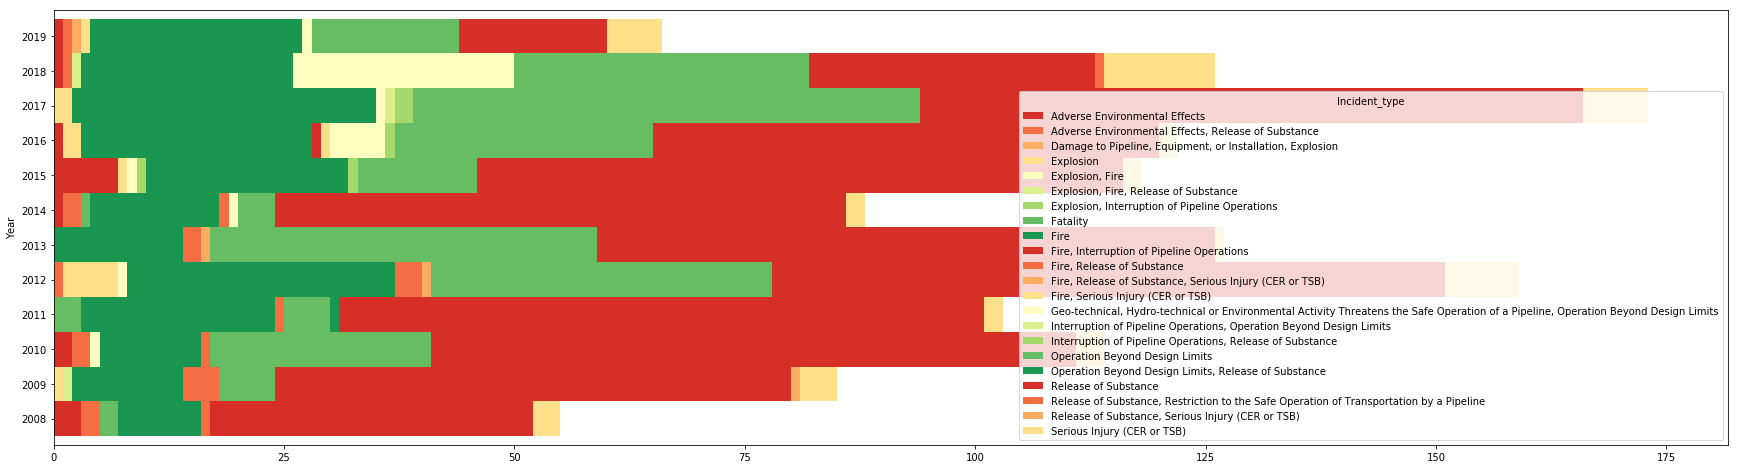

In [19]:
pd.crosstab(data.Year,data.Incident_type).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(30,8)
plt.show()

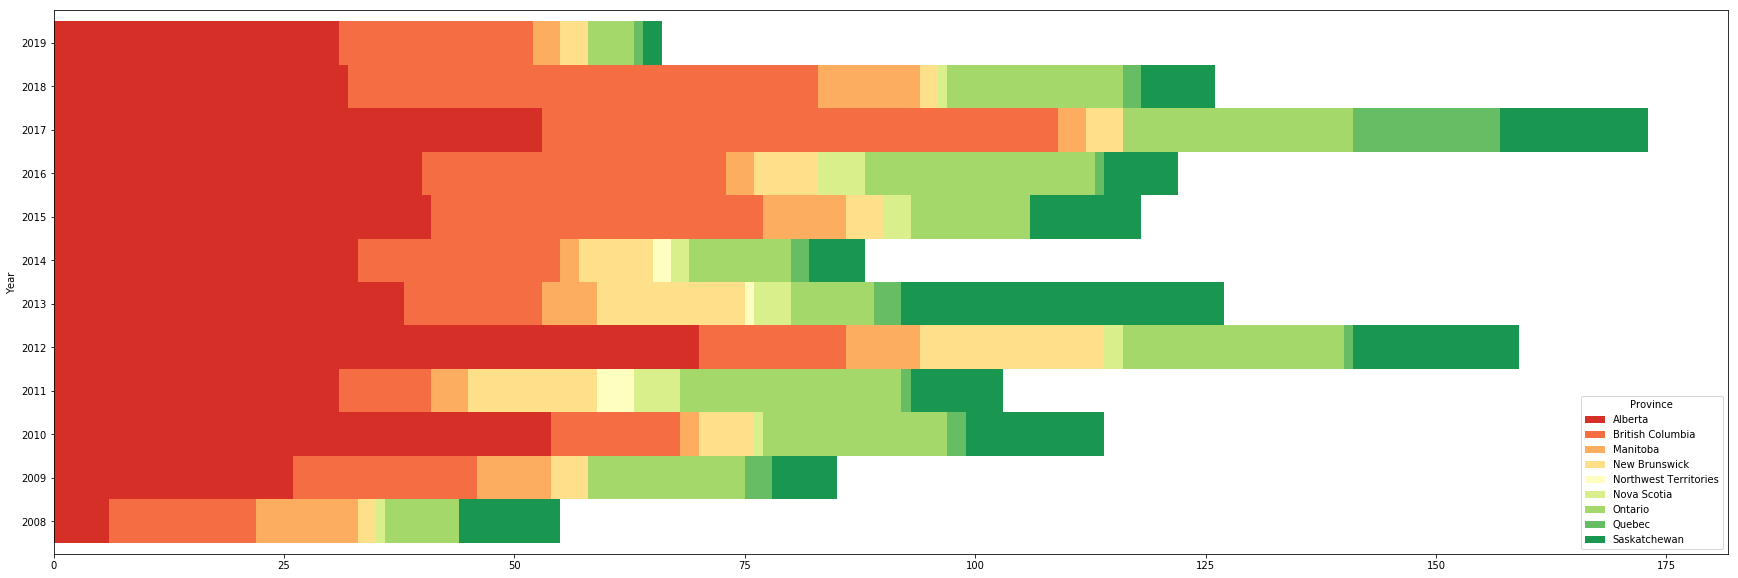

In [20]:
pd.crosstab(data.Year,data.Province).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(30,10)
plt.show()

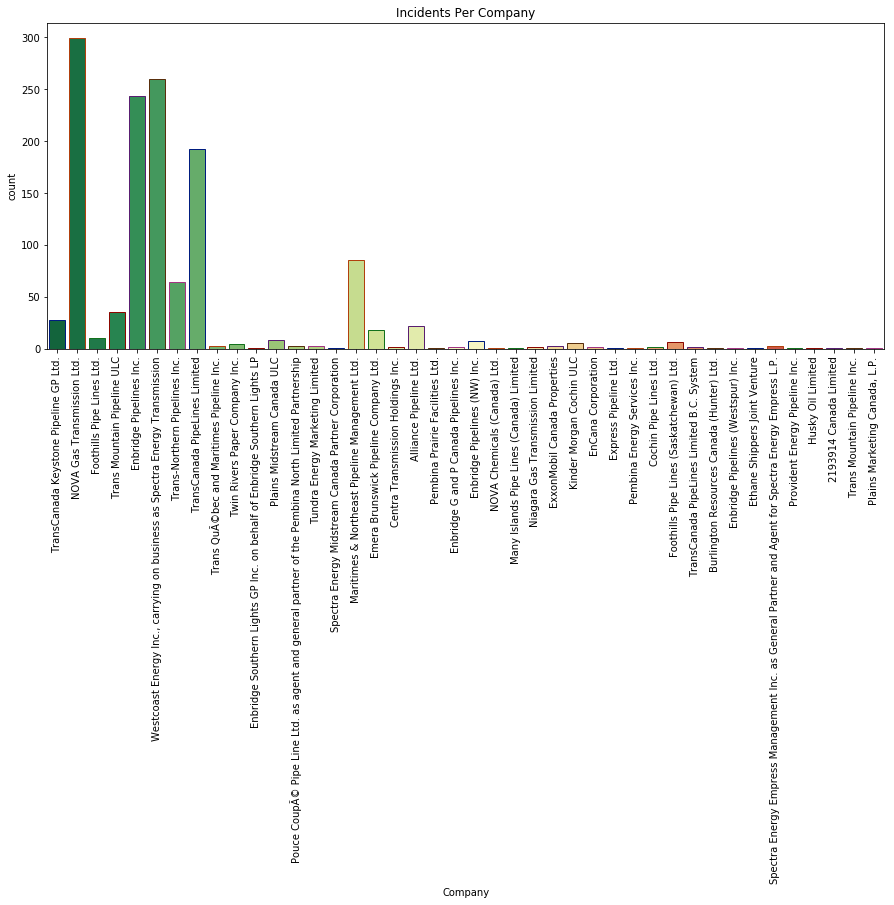

In [21]:

plt.subplots(figsize=(15,6))
sns.countplot('Company',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Incidents Per Company')
plt.show()

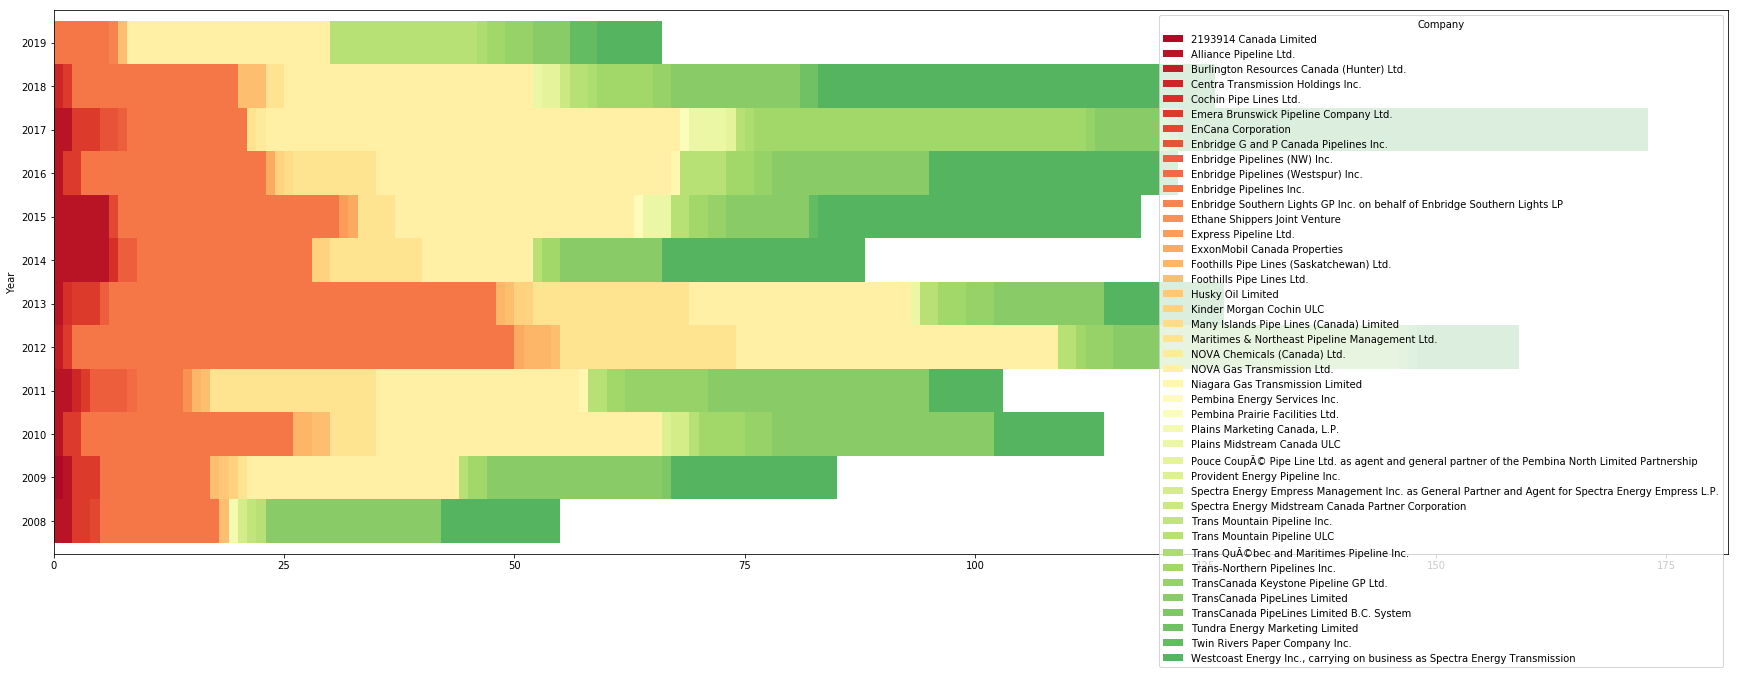

In [22]:
pd.crosstab(data.Year,data.Company).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',50))
fig=plt.gcf()
fig.set_size_inches(30,10)
plt.show()

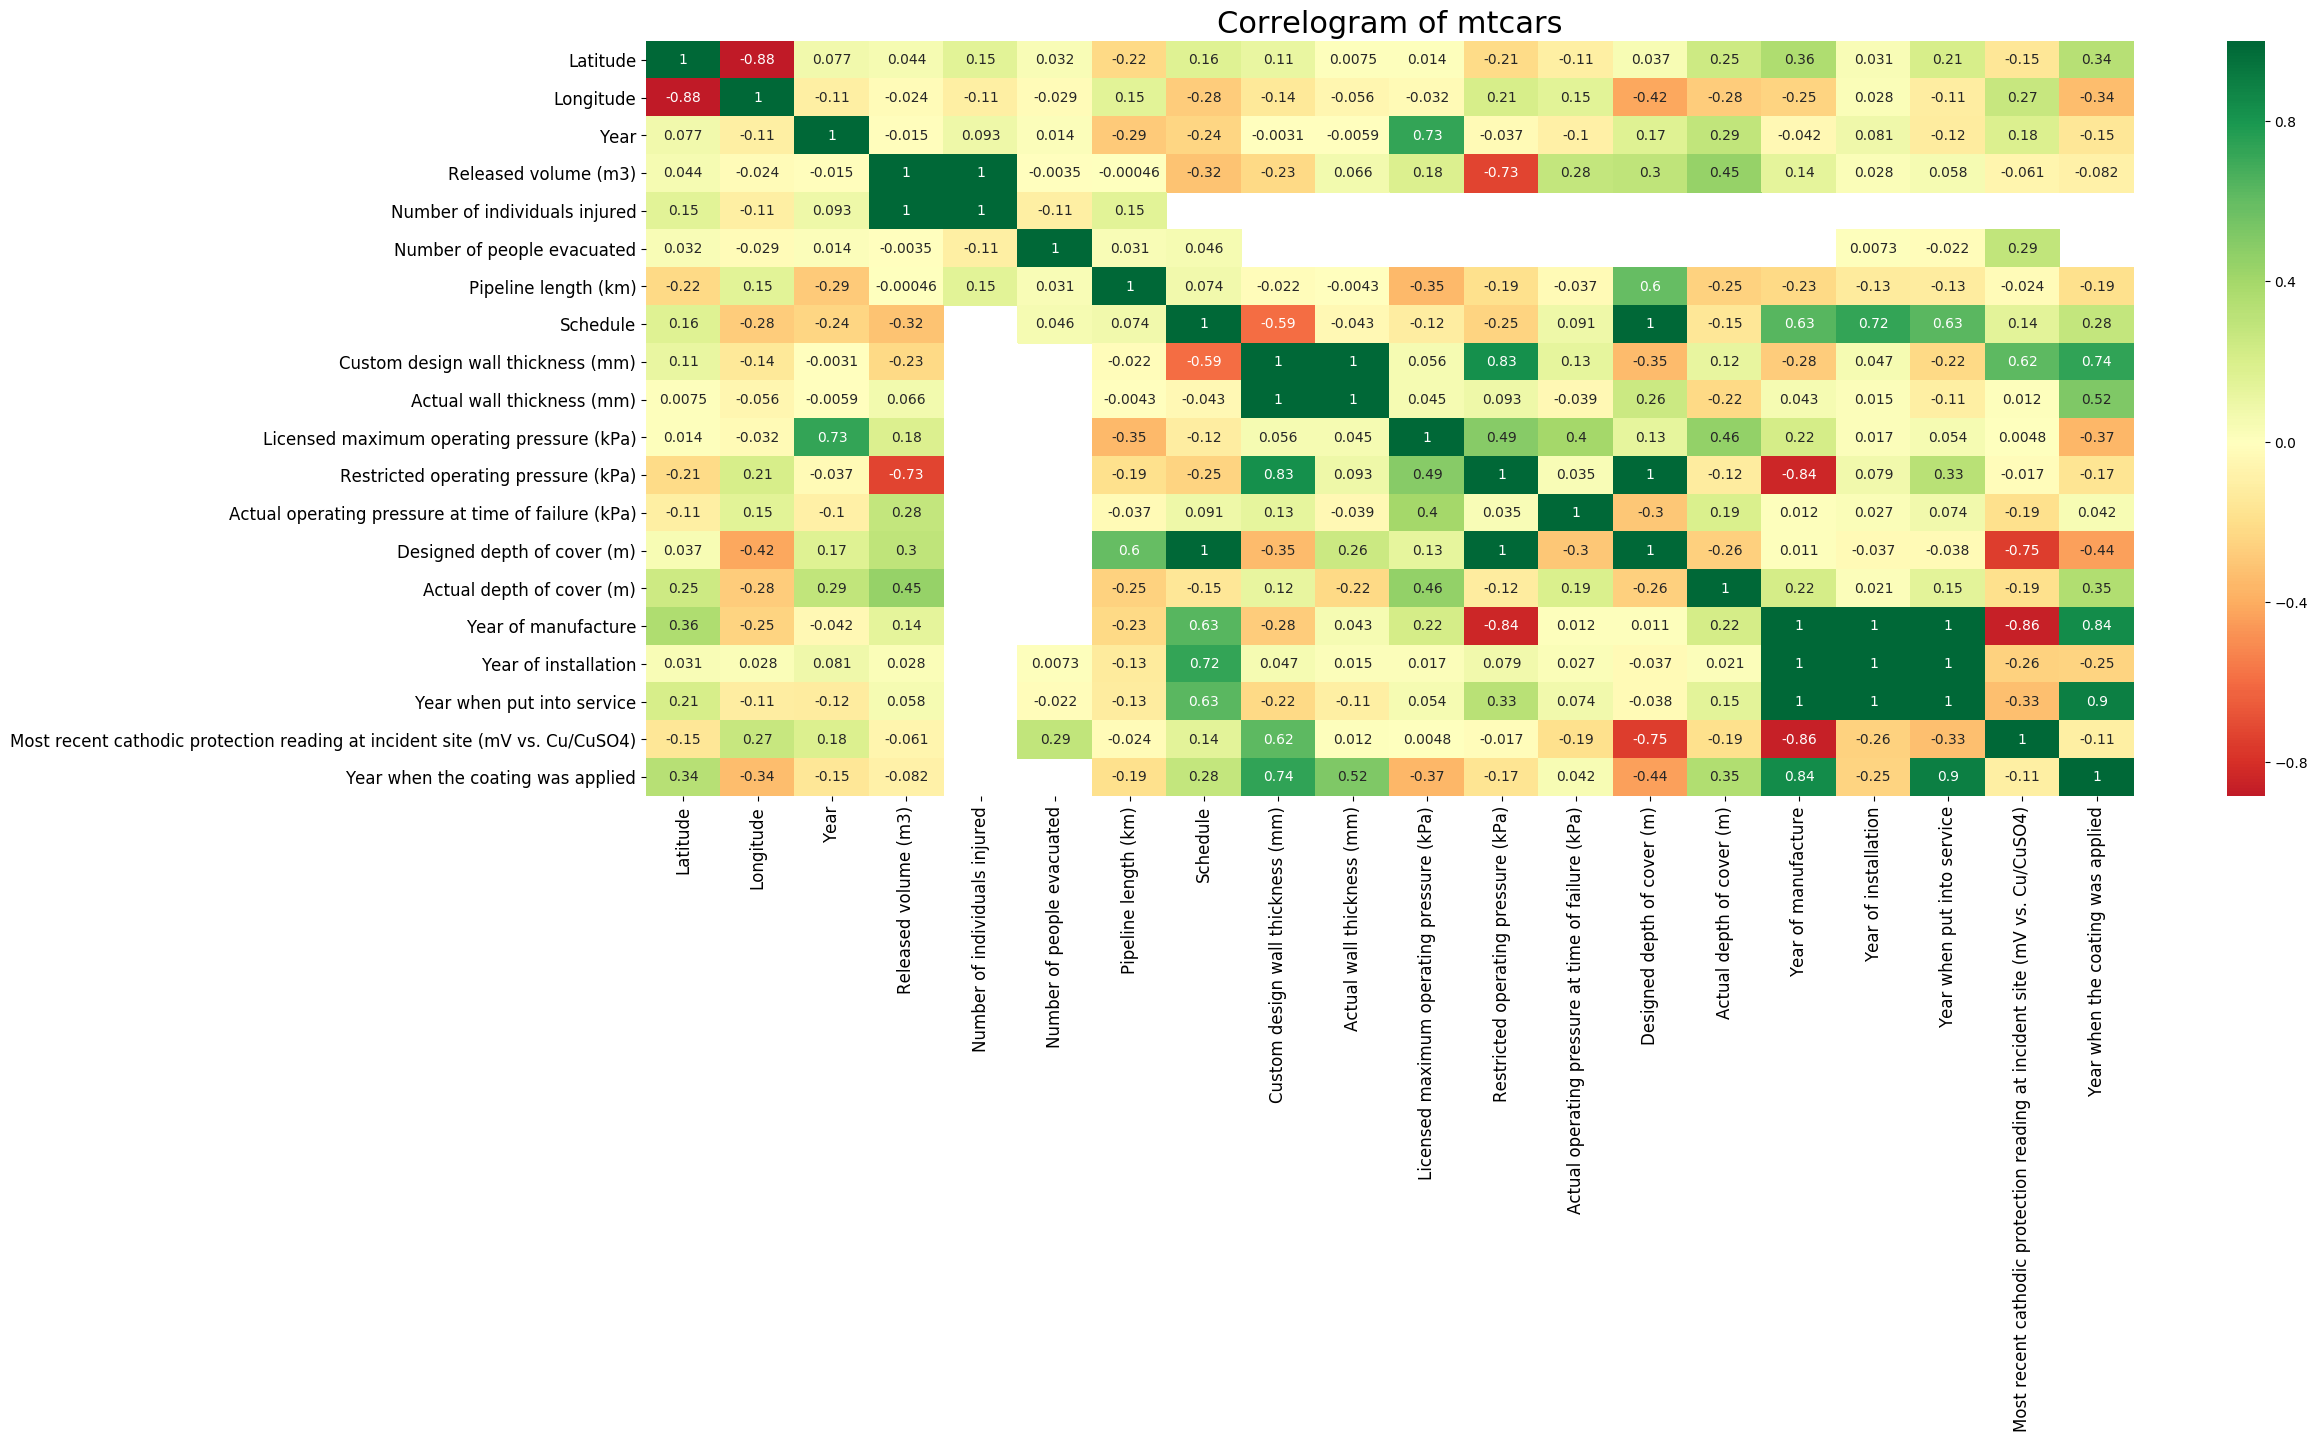

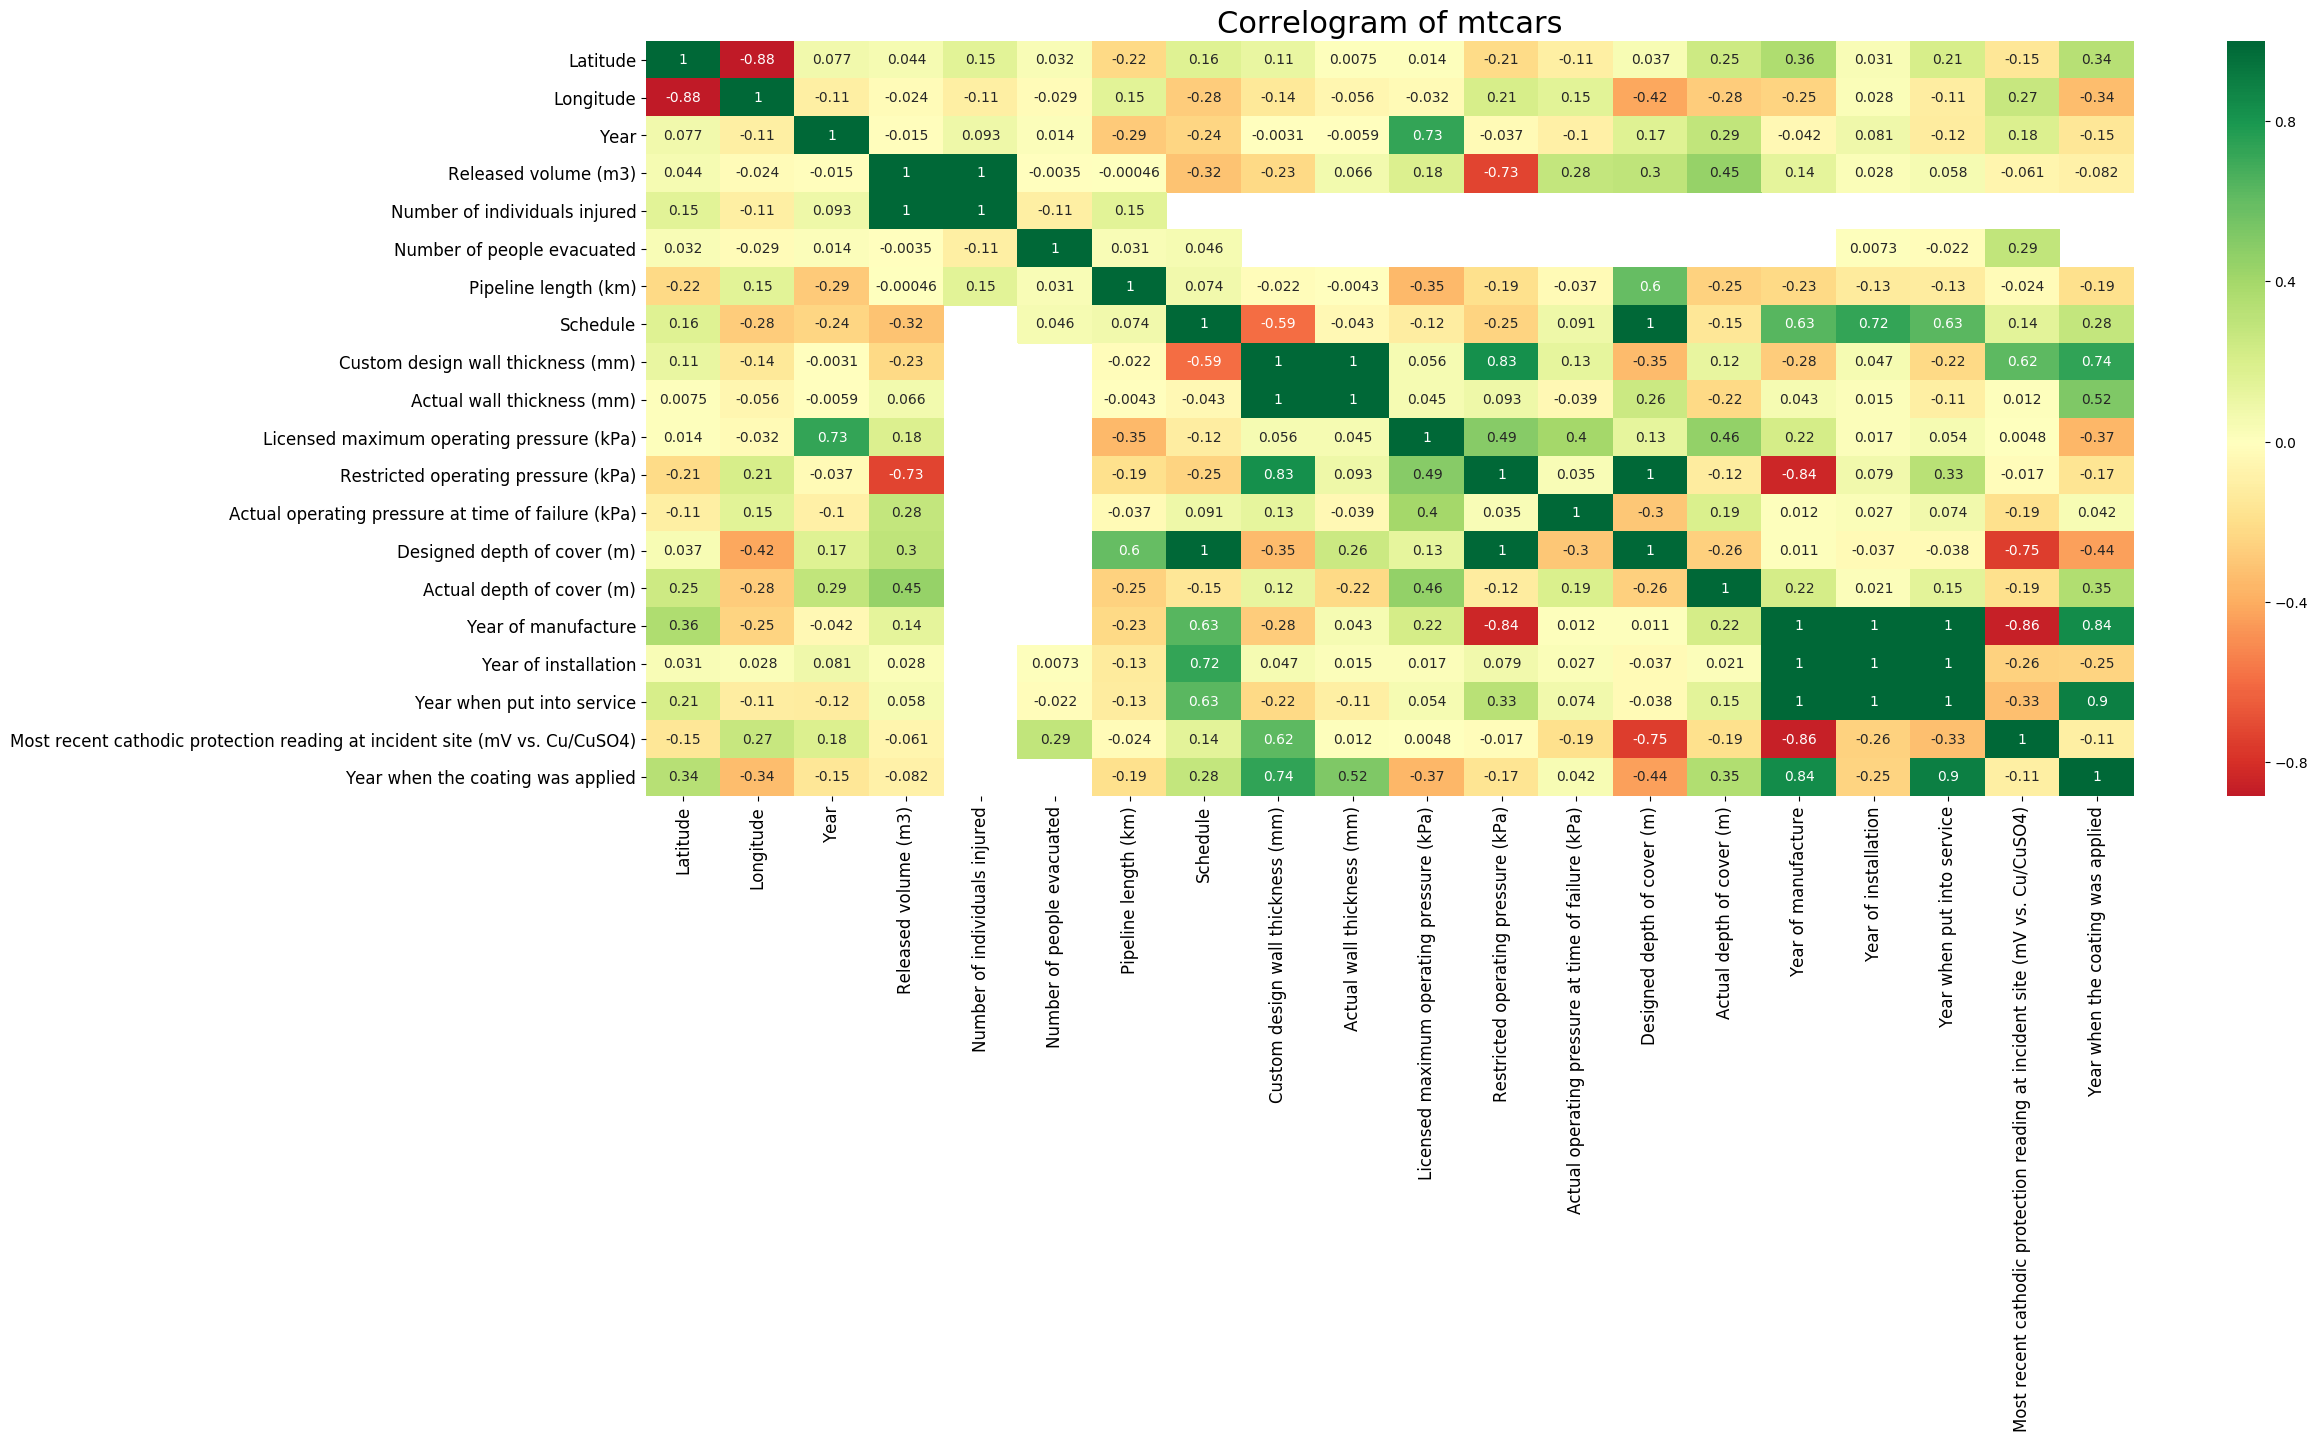

In [23]:

# Plot
plt.figure(figsize=(24,10), dpi= 100)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gcf()

1323
Year
2008    12.727273
2009     4.705882
2010    20.175439
2011     8.737864
2012    10.062893
2013     7.086614
2014    14.772727
2015    23.728814
2016    15.573770
2017    19.653179
2018    18.253968
2019    18.867925
dtype: float64
14.528862358853212
Year  Emergency Level
2008  Level I             5
      Level III           2
2009  Level I             3
      Level III           1
2010  Level I            23
2011  Level I             9
2012  Level I            12
      Level II            3
      Level III           1
2013  Level I             7
      Level II            2
2014  Level I            11
      Level II            1
      Level III           1
2015  Level I            25
      Level II            3
2016  Level I            16
      Level II            3
2017  Level I            28
      Level II            6
2018  Level I            14
      Level II            3
      Not Emergency       6
2019  Not Emergency      10
dtype: int64
Year  Land Use                   

TypeError: cannot unpack non-iterable AxesSubplot object

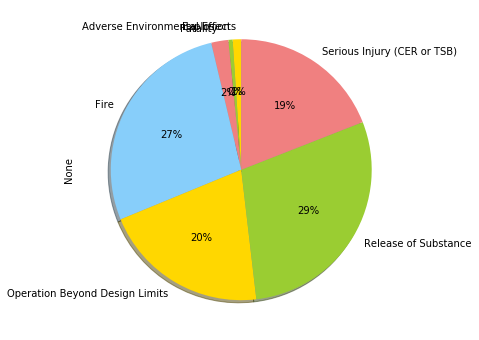

In [98]:
plt.subplots(figsize=(15,6))
number_of_human = data["Why it happened category"]

print(number_of_human.count())
year = data.groupby(['Year'])
year=(year.size())


number_of_human = data[
    (data["Why it happened category"].str.contains("Human")
    )
]

# print(number_of_human.count())
# display(number_of_human)
human_group = number_of_human.groupby(['Year'])
human=(human_group.size())

lst=(human/year*100)
print(lst)
print(sum(lst) / len(lst) )
emergency = number_of_human.groupby(['Year', 'Emergency Level'])
print(emergency.size())


emergency = number_of_human.groupby(['Year', 'Land Use'])
print(emergency.size())
incident = number_of_human[
    ~(number_of_human["Incident type"].str.contains(",")
    )
]
incident.dropna()
incident_group = incident.groupby([ 'Incident type'])
incident = incident.groupby([ 'Incident type'])

incident = incident.size()

incident = incident
incident.round()



print(incident)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
 # explode 1st slice

patches, texts = incident.plot.pie( colors=colors,autopct='%1i%%', shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
# human.plot()
# ax = sns.barplot(x = "year",y = "percentage" , data=human_group)
# # sns.countplot("Year",data=human_group,palette='inferno',order=human_group.count().index)
# # plt.xticks(rotation=90)
# # plt.title('Incident by company')
# plt.show()